[-0.14814814814814814, -0.037037037037037035, 0.07407407407407407, 0.18518518518518517, 0.2962962962962963, 0.40740740740740744, 0.5185185185185185, 0.6296296296296297, 0.7407407407407407, 0.8518518518518519]
0.9267734553775744


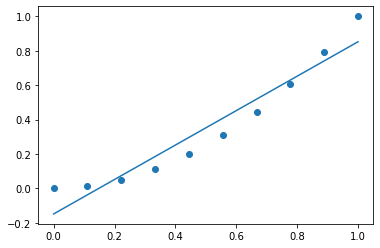

In [26]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    
    def __init__(self):
        self.mean_x = self.mean_y = 0
        self.slope = self.intercept = 0

    def fit(self, X, y):
        x = np.array(X).reshape(-1)
        y = np.array(y)
        self.mean_x, self.mean_y = np.mean(x), np.mean(y)
        self.slope = sum((self.mean_x - x) * (self.mean_y - y)) / sum((self.mean_x - x) ** 2)
        self.intercept = self.mean_y - self.mean_x * self.slope

    def predict(self, X):
        x = np.array(X).reshape(-1)
        return [self.slope * val + self.intercept for val in x]

    def r2_score(self, y_true, y_pred):
        return sum((np.array(y_pred) - self.mean_y) ** 2) / sum((np.array(y_true) - self.mean_y) ** 2)
    
def normal_scale(x):
    x = np.array(x)
    return (x - min(x)) / (max(x) - min(x))

x = list(range(10))    
y = [val ** 2 for val in x]
x = normal_scale(x)
y = normal_scale(y)

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
print(y_pred)
print(model.r2_score(y, y_pred))
plt.scatter(x, y)
plt.plot(x, y_pred)
plt.show()

In [36]:
# Scaling the Features

class NormalScaler:
    
    def __init__(self):
        self.array = None
    
    def fit(self, x):
        self.array = np.array(x)

    def transform(self):
        return (self.array - min(self.array)) / (max(self.array) - min(self.array))
    
class StandardScaler:
    
    def __init__(self):
        self.array = None
    
    def fit(self, x):
        self.array = np.array(x)

    def transform(self):
        return (self.array - np.mean(self.array)) / (np.std(self.array))

x = list(range(10))
y = [val ** 2 for val in x]

scaler = NormalScaler()
scaler.fit(x)
x = scaler.transform()
print(x)

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform()
print(x, np.mean(x), np.std(x))

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[-1.5666989  -1.21854359 -0.87038828 -0.52223297 -0.17407766  0.17407766
  0.52223297  0.87038828  1.21854359  1.5666989 ] -1.1102230246251565e-16 1.0


In [146]:
# Splitting the data into training and testing data

import numpy as np
import pandas as pd

df = pd.read_csv("iris_dataset.csv")
df.drop('Unnamed: 0', axis = 1, inplace = True)

def split_data(X, y, test_size, random_state = None):
    if random_state:
        np.random.seed(random_state)
    random_indices = np.random.choice(np.arange(len(X)), p = 1, size = int((1 - test_size) * len(X)))
    X_train = X.iloc[random_indices]
    y_train = y[random_indices]
    X_test = [x for x in range(len(X)) if x not in random_indices]
    print(X_test, random_indices)

split_data(df.drop('target', axis = 1), df['target'], 0.2)

TypeError: object of type 'int' has no len()

In [82]:
x = np.random.randint(100, size = (10))
print(x)

df.iloc[[0, 2]]

[61 13 89 18 54 55 12 56 64 53]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


Slope : 10.0 Intercept : -18.333333333333332


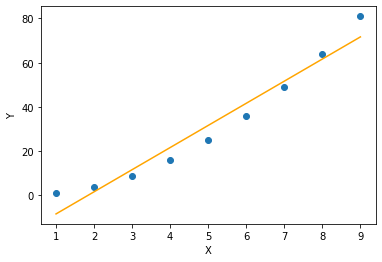

R-Square : 0.9511731135066583


In [25]:
# Implementing Linear Regression Without Using Sklearn

import numpy as np
import matplotlib.pyplot as plt

X = np.array(range(1, 10))
y = np.array([x ** 2 for x in X])

plt.scatter(X, y)

mean_x, mean_y = np.mean(X), np.mean(y)

slope = sum((mean_x - X) * (mean_y - y)) / sum((mean_x - X) ** 2)
intercept = mean_y - mean_x * slope
print("Slope :", slope, "Intercept :", intercept)

y_predicted = [slope * x + intercept for x in X]

plt.xlabel("X")
plt.ylabel("Y")
plt.plot(X, y_predicted, color = "orange")
plt.show()

# Calculating the goodness of fit (r square)

r_square = sum((y_predicted - mean_y) ** 2) / sum((y - mean_y) ** 2)
print("R-Square :", r_square)

Slope :  [10.] Intercept :  -18.33333333333334


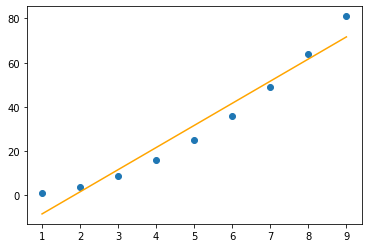

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.

In [88]:
# Implementing Linear Regression Using Sklearn

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics

X = np.array(range(1, 10)).reshape(-1, 1)
temp = np.array(range(1, 10))
y = np.array([x ** 2 for x in temp])

plt.scatter(temp, y)

model = linear_model.LinearRegression()
model.fit(X, y)

print("Slope : ", model.coef_, "Intercept : ", model.intercept_)

y_predicted = model.predict(X)

plt.plot(temp, y_predicted, color = "orange")
plt.show()

print("R2 Score : ", metrics.r2_score(y, ['a', 'c', 'd', 'e', 'f', 1, 2, 4, 6]))